<H1>CSC221 Group Project</H1>

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
# Import library to open URLs
import urllib.request

# Import the BeautifulSoup library to parse HTML and XML documents
from bs4 import BeautifulSoup

# Specify which URL/web page to be scraped
url = "https://en.wikipedia.org/wiki/2022_Kentucky_Derby"

# Open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# Parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [3]:
# Underlying HTML
#print(soup.prettify())

In [4]:
# Use find_all() to find all the <table...> tag with class_='wikitable sortable'
all_sortable_tables=soup.find_all("table", class_='wikitable sortable')

# Print the length of all_sortable_tables
print(len(all_sortable_tables))

# Iterate thru all_sortable_tables and print each table entry
for table in all_sortable_tables:
    print(f"SORTABLE TABLE: {table}\n")

1
SORTABLE TABLE: <table border="1" class="wikitable sortable">
<tbody><tr>
<th scope="col">Finish
</th>
<th scope="col">Program Number
</th>
<th scope="col">Horse
</th>
<th scope="col">Qualifying Points<sup class="reference" id="cite_ref-Leaderboard_2-5"><a href="#cite_note-Leaderboard-2">[2]</a></sup>
</th>
<th scope="col">Trainer
</th>
<th scope="col">Jockey
</th>
<th scope="col">Morning Line Odds<sup class="reference" id="cite_ref-WaPoAnalysis_50-0"><a href="#cite_note-WaPoAnalysis-50">[50]</a></sup>
</th>
<th scope="col">Final Odds
</th>
<th class="unsortable" scope="col"><a href="/wiki/Glossary_of_North_American_horse_racing#M" title="Glossary of North American horse racing">Margin</a> (<a href="/wiki/Horse_length" title="Horse length">Lengths</a>)
</th>
<th scope="col">Winnings
</th></tr>
<tr>
<td>1
</td>
<td>21<sup class="reference" id="cite_ref-51"><a href="#cite_note-51">[a]</a></sup>
</td>
<td><a href="/wiki/Rich_Strike" title="Rich Strike">Rich Strike</a>
</td>
<td>21
</td>

In [5]:
right_table = all_sortable_tables[0]
# Print the right_table entry
#print(f"RIGHT TABLE: {right_table}\n")

In [6]:
# Create a list for each of column of data
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) == 10:
        A.append(cells[0].find(text=True).strip())
        B.append(cells[1].find(text=True).strip())
        C.append(cells[2].find(text=True).strip())
        D.append(cells[3].find(text=True).strip())
        E.append(cells[4].find(text=True).strip())
        F.append(cells[5].find(text=True).strip())
        G.append(cells[6].find(text=True).strip())
        H.append(cells[7].find(text=True).strip())
        I.append(cells[8].find(text=True).strip())
        J.append(cells[9].find(text=True).strip())

In [56]:
# Import Pandas library
import pandas as pd

# Create a DataFrame using column 'A' to start, then ...
df=pd.DataFrame(A,columns=['Finish'])

# add each of the lists as a column in the DataFrame with the required column name
df=pd.DataFrame(A,columns=['Finish'])
df['Program Number']=B
df['Horse']=C
df['Qualifying Points']=D
df['Trainer']=E
df['Jockey']=F
df['Morning Line Odds']=G
df['Final Odds']=H
df['Margin']=I
df['Winnings']=J

# Display the DataFrame
df.head(11)

,Finish,Program Number,Horse,Qualifying Points,Trainer,Jockey,Morning Line Odds,Final Odds,Margin,Winnings
0,1,21,Rich Strike,21,Eric Reed,Sonny Leon,30-1,80.80,,"$1,860,000"
1,2,3,Epicenter,164,Steve Asmussen,Joel Rosario,7-2,4.10,3,"$600,000"
2,3,10,Zandon,114,Chad C. Brown,Flavien Prat,3-1,6.10,1,"$300,000"
3,4,13,Simplification,74,Antonio Sano,José Ortiz,20-1,35.30,3,"$150,000"
4,5,1,Mo Donegal,112,Todd A. Pletcher,Irad Ortiz Jr.,10-1,10.10,3,"$90,000"
5,6,14,Barber Road,58,John Ortiz,Reylu Gutierrez,30-1,60.40,4,
6,7,18,Tawny Port,60,Brad H. Cox,Ricardo Santana Jr.,30-1,80.50,4,
7,8,5,Smile Happy,70,Kenneth G. McPeek,Corey Lanerie,20-1,14.10,10,
8,9,9,Tiz the Bomb,110,Kenneth G. McPeek,Brian Hernandez Jr.,30-1,31.00,12,
9,10,19,Zozos,40,Brad H. Cox,Manuel Franco,20-1,48.70,15,


In [107]:
import os # provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [176]:
#cols = ['Finish', 'Program Number', 'Horse', 'Qualifying Points', 'Trainer', 'Jockey', 'Morning Line Odds', 'Final Odds', 'Margin', 'Winnging']
DF_KD = pd.read_csv('CSC221-webscrape-data.csv')
DF_KD

,Unnamed: 0,Finish,Program Number,Horse,Qualifying Points,Trainer,Jockey,Morning Line Odds,Final Odds,Margin,Winnings
0,0,1,21,Rich Strike,21,Eric Reed,Sonny Leon,30-1,80.8,NaN,"$1,860,000"
1,1,2,3,Epicenter,164,Steve Asmussen,Joel Rosario,7-2,4.1,3.0,"$600,000"
2,2,3,10,Zandon,114,Chad C. Brown,Flavien Prat,3-1,6.1,1.0,"$300,000"
3,3,4,13,Simplification,74,Antonio Sano,José Ortiz,20-1,35.3,3.0,"$150,000"
4,4,5,1,Mo Donegal,112,Todd A. Pletcher,Irad Ortiz Jr.,10-1,10.1,3.0,"$90,000"
5,5,6,14,Barber Road,58,John Ortiz,Reylu Gutierrez,30-1,60.4,4.0,NaN
6,6,7,18,Tawny Port,60,Brad H. Cox,Ricardo Santana Jr.,30-1,80.5,4.0,NaN
7,7,8,5,Smile Happy,70,Kenneth G. McPeek,Corey Lanerie,20-1,14.1,10.0,NaN
8,8,9,9,Tiz the Bomb,110,Kenneth G. McPeek,Brian Hernandez Jr.,30-1,31.0,12.0,NaN
9,9,10,19,Zozos,40,Brad H. Cox,Manuel Franco,20-1,48.7,15.0,NaN


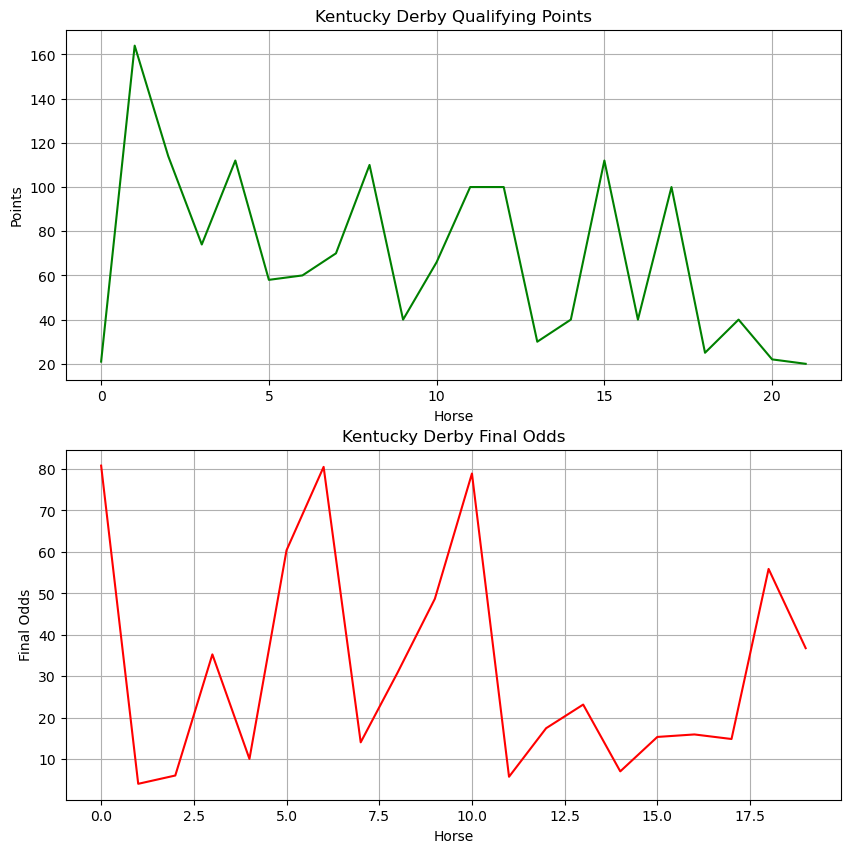

In [180]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1)
Q_POINTS = DF_KD[['Qualifying Points']].to_numpy()
Q_POINTS = Q_POINTS.astype('int32')
plt.plot(Q_POINTS, 'g')
plt.title('Kentucky Derby Qualifying Points')
plt.xlabel('Horse')
plt.ylabel('Points')
plt.grid()

plt.subplot(2,1,2)
FINAL_ODDS = DF_KD[['Final Odds']].to_numpy()
plt.plot(FINAL_ODDS, 'r')
plt.title('Kentucky Derby Final Odds')
plt.xlabel('Horse')
plt.ylabel('Final Odds')
plt.grid()

plt.show()